<a href="https://colab.research.google.com/github/JEEVA-JOSLIN/DEEP-LEARNING-ASSIGNMENT/blob/main/DEEP_LEARNING_ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 [==============================] - 9s 12ms/step - loss: 0.2259 - val_loss: 0.1591
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1416 - val_loss: 0.1252
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1183 - val_loss: 0.1101
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1074 - val_loss: 0.1023
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1012 - val_loss: 0.0977
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0977 - val_loss: 0.0953
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0958 - val_loss: 0.0940
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0949 - val_loss: 0.0933
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0944 - val_loss: 0.0929
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


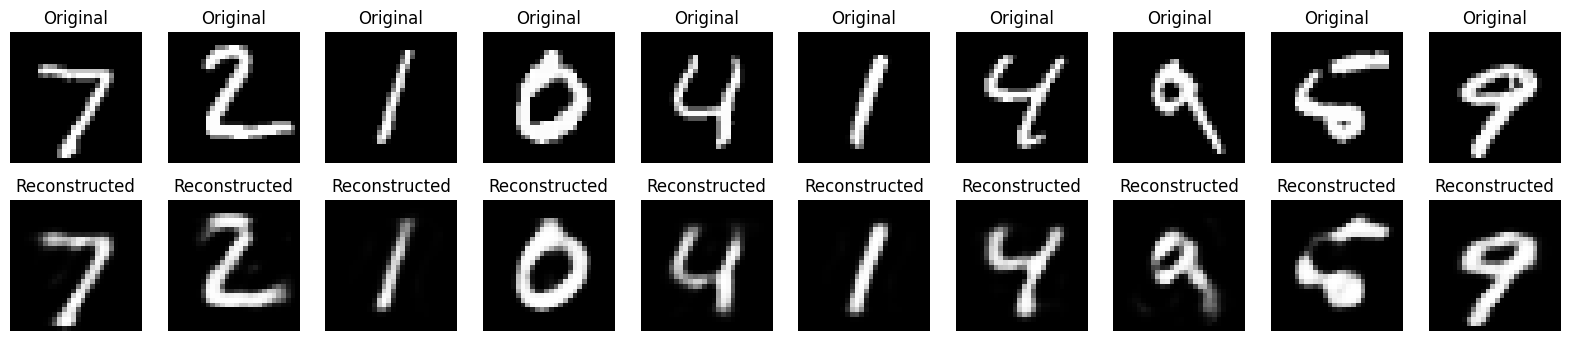

1/1 [==============================] - 0s 21ms/step


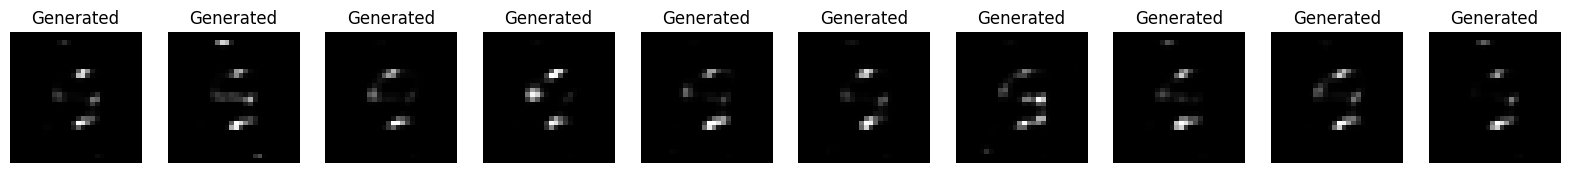

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define input dimension
input_dim = x_train.shape[1]

# Define the autoencoder architecture
encoding_dim = 32  # Size of encoded representations

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Reconstruct inputs
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()

# Generate new images by encoding and decoding random noise
encoded_imgs = autoencoder.predict(np.random.random((n, input_dim)))
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Generated')
    plt.axis('off')
plt.show()
